In [399]:
import pandas as pd

In [400]:
import numpy as np
import matplotlib.pyplot as plt


Load dataset

In [401]:
full_dataset = pd.read_csv('candidates_toolkit/data/hist_features.csv', sep = ';', decimal = ',')

/Users/davidmasip/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Features target encoding

In [402]:
feats_te = pd.read_csv('candidates_toolkit/data/featu_1')
features_te = feats_te.iloc[:,1:]
features_te['id'] = features_te['id'].astype('O')

Join features

In [406]:
full_dataset = pd.concat([full_dataset, features_te], axis=1)

Split in train and test

In [409]:
train_dataset = full_dataset[full_dataset.churn.notna()]
test_dataset = full_dataset[full_dataset.churn.isna()]


churn = train_dataset.churn
train_features = train_dataset.drop(['churn', 'Churn_probability'], axis=1)
test_features = test_dataset.drop(['churn', 'Churn_probability'], axis=1)

In [410]:
from sklearn.model_selection import train_test_split

In train set, split to do proper validation

In [411]:
train, test, churn_train, churn_test = train_test_split(train_features, churn, stratify = churn, test_size = 0.2)

Load libraries

In [413]:
from sklearn.linear_model import LogisticRegressionCV, Lasso
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

Create Lasso

In [414]:
lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

Grid search lasso space

In [415]:
clf = GridSearchCV(lasso, tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)

Create features

In [416]:
X_train = train.loc[:, train.dtypes[train.dtypes != 'object'].keys()]
X_test = test.loc[:, test.dtypes[test.dtypes != 'object'].keys()]
X_real_test = test_features.loc[:, test_features.dtypes[test_features.dtypes != 'object'].keys()]

In [417]:
X_train = X_train.drop('campaign_disc_ele', axis=1)
X_test = X_test.drop('campaign_disc_ele', axis=1)
X_real_test = X_real_test.drop('campaign_disc_ele', axis=1)

Impute missings

In [418]:
from sklearn.preprocessing.imputation import Imputer
imp = Imputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)

Imputer(axis=0, copy=True, missing_values=nan, strategy='mean', verbose=0)

In [419]:
X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)
X_real_test_imp = imp.transform(X_real_test)

Train lasso

In [420]:
clf.fit(X_train_imp, churn_train)

/Users/davidmasip/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/davidmasip/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/davidmasip/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/davidmasip/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([1.00000e-04, 1.32035e-04, 1.74333e-04, 2.30181e-04, 3.03920e-04,
       4.01281e-04, 5.29832e-04, 6.99564e-04, 9.23671e-04, 1.21957e-03,
       1.61026e-03, 2.12611e-03, 2.80722e-03, 3.70651e-03, 4.89390e-03,
       6.46167e-03, 8.53168e-03, 1.12648e-02, 1.48735e-02, 1.96383e-02,
       2.59294e-02, 3.42360e-02, 4.52035e-02, 5.96846e-02, 7.88046e-02,
       1.04050e-01, 1.37382e-01, 1.81393e-01, 2.39503e-01, 3.16228e-01])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [421]:
clf.best_params_

{'alpha': 0.0001}

Lasso results

In [422]:
clf.grid_scores_

[mean: 0.77253, std: 0.01234, params: {'alpha': 0.0001},
 mean: 0.77203, std: 0.01244, params: {'alpha': 0.00013203517797162948},
 mean: 0.77117, std: 0.01266, params: {'alpha': 0.00017433288221999874},
 mean: 0.76964, std: 0.01296, params: {'alpha': 0.00023018073130224678},
 mean: 0.76811, std: 0.01293, params: {'alpha': 0.0003039195382313198},
 mean: 0.76817, std: 0.01268, params: {'alpha': 0.0004012807031942776},
 mean: 0.76831, std: 0.01270, params: {'alpha': 0.0005298316906283707},
 mean: 0.76830, std: 0.01271, params: {'alpha': 0.0006995642156712634},
 mean: 0.76800, std: 0.01284, params: {'alpha': 0.0009236708571873865},
 mean: 0.76735, std: 0.01297, params: {'alpha': 0.0012195704601594415},
 mean: 0.76627, std: 0.01333, params: {'alpha': 0.0016102620275609393},
 mean: 0.76435, std: 0.01364, params: {'alpha': 0.0021261123338996556},
 mean: 0.76070, std: 0.01415, params: {'alpha': 0.0028072162039411755},
 mean: 0.75253, std: 0.01446, params: {'alpha': 0.0037065129109221566},
 mea

In [423]:
def get_features_sorted(clf, X, is_grid_search):
    if is_grid_search:
        non_zero_columns = X.columns[clf.best_estimator_.coef_ != 0]
        non_zero_coefficients = clf.best_estimator_.coef_[clf.best_estimator_.coef_ != 0]
    else:
        non_zero_columns = X.columns[clf.coef_ != 0]
        non_zero_coefficients = clf.coef_[clf.coef_ != 0]
    features_dictionary = {non_zero_columns[i] : non_zero_coefficients[i] for i in range(len(non_zero_columns))}
    return dict(sorted(features_dictionary.items(),  key=lambda kv: abs(kv[1]), reverse=True))

Features importance lasso

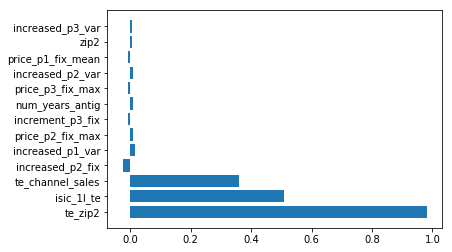

In [424]:
importances_lasso = get_features_sorted(clf, X_train, True)

importances_lasso_filtered = {k : v for k, v in (importances_lasso.items()) if abs(v) > 0.005}

plt.barh(range(len(importances_lasso_filtered)), list(importances_lasso_filtered.values()))
plt.yticks(range(len(importances_lasso_filtered)), list(importances_lasso_filtered.keys()))

plt.show()

In [485]:
pd.DataFrame(full_dataset.groupby('channel_sales')['te_channel_sales'].max()).sort_values('te_channel_sales', ascending = False)

,te_channel_sales
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,0.124467
usilxuppasemubllopkaafesmlibmsdf,0.099405
ewpakwlliwisiwduibdlfmalxowmwpci,0.089219
lmkebamcaaclubfxadlmueccxoimlema,0.053211
epumfxlbckeskwekxbiuasklxalciiuu,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000


In [451]:
import pickle


with open('candidates_toolkit/data/lasso.pickle', 'wb') as handle:
    pickle.dump(importances_lasso, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [425]:
from catboost import CatBoostClassifier

In [426]:
params = {#'depth': [4, 7, 10],
          #'learning_rate' : [0.03, 0.1, 0.15],
          #'l2_leaf_reg': [1,4,9],
         'depth': [4],
          'learning_rate' : [0.03, 0.15],
         'l2_leaf_reg': [1],
         'iterations': [300]}
cb = CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv=5, refit=True, n_jobs=4)
cb_model.fit(X_train_imp, churn_train)

0:	learn: 0.6656729	total: 115ms	remaining: 34.5s
0:	learn: 0.6622773	total: 172ms	remaining: 51.6s
0:	learn: 0.6659432	total: 145ms	remaining: 43.2s
0:	learn: 0.6625173	total: 197ms	remaining: 58.9s
1:	learn: 0.6345683	total: 354ms	remaining: 52.7s
1:	learn: 0.6367115	total: 301ms	remaining: 44.8s
1:	learn: 0.6370812	total: 333ms	remaining: 49.6s
1:	learn: 0.6380893	total: 427ms	remaining: 1m 3s
2:	learn: 0.6104526	total: 464ms	remaining: 46s
2:	learn: 0.6108307	total: 502ms	remaining: 49.7s
2:	learn: 0.6089892	total: 540ms	remaining: 53.5s
2:	learn: 0.6149049	total: 642ms	remaining: 1m 3s
3:	learn: 0.5894947	total: 666ms	remaining: 49.3s
3:	learn: 0.5888488	total: 685ms	remaining: 50.7s
3:	learn: 0.5884598	total: 768ms	remaining: 56.9s
3:	learn: 0.5904548	total: 797ms	remaining: 58.9s
4:	learn: 0.5698859	total: 879ms	remaining: 51.9s
4:	learn: 0.5682519	total: 878ms	remaining: 51.8s
4:	learn: 0.5686928	total: 958ms	remaining: 56.5s
4:	learn: 0.5678250	total: 1.03s	remaining: 1m
5:	le

GridSearchCV(cv=5, error_score='raise',
       estimator=<catboost.core.CatBoostClassifier object at 0x1a182a0dd8>,
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'depth': [4], 'learning_rate': [0.03, 0.15], 'l2_leaf_reg': [1], 'iterations': [300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [427]:
cb_model.grid_scores_

[mean: 0.78514, std: 0.01370, params: {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.03},
 mean: 0.78560, std: 0.01040, params: {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.15}]

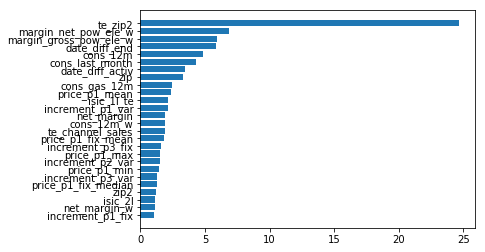

In [486]:
importances_dict = {X_train.columns[i] : (cb_model.best_estimator_.feature_importances_)[i] for i in range(len(X_train.columns))}

importances_dict_filtered = {k : v for k, v in importances_dict.items() if v > 1}

importances_dict_filtered = dict(sorted(importances_dict_filtered.items(),  key=lambda kv: abs(kv[1])))

plt.barh(range(len(importances_dict_filtered)), list(importances_dict_filtered.values()))
plt.yticks(range(len(importances_dict_filtered)), list(importances_dict_filtered.keys()))

plt.show()

In [450]:
import pickle


with open('candidates_toolkit/data/catboost.pickle', 'wb') as handle:
    pickle.dump(importances_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [429]:
sum((cb_model.predict_proba(X_real_test_imp)[:,1]) > 0.8)

8

# XGBoost

In [430]:
from xgboost import XGBClassifier

In [431]:
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01, 5e-3], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}



xgb = XGBClassifier()

In [432]:
xgb_model = GridSearchCV(xgb, parameters, scoring="roc_auc", cv=5, refit=True, n_jobs=4)

In [433]:
xgb_model.fit(X_train_imp, churn_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'objective': ['binary:logistic'], 'learning_rate': [0.01, 0.005], 'max_depth': [6], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.7], 'n_estimators': [100, 50], 'missing': [-999], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [434]:
xgb_model.grid_scores_

[mean: 0.77699, std: 0.01349, params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 100, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8},
 mean: 0.77334, std: 0.01343, params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8},
 mean: 0.77490, std: 0.01367, params: {'colsample_bytree': 0.7, 'learning_rate': 0.005, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 100, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8},
 mean: 0.77279, std: 0.01369, params: {'colsample_bytree': 0.7, 'learning_rate': 0.005, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 50, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}]

In [435]:
from sklearn.metrics import auc, roc_auc_score

xgb_model.predict_proba(X_train_imp)

array([[0.7720477 , 0.2279523 ],
       [0.60459566, 0.39540437],
       [0.7869314 , 0.2130686 ],
       ...,
       [0.79992205, 0.20007797],
       [0.7912052 , 0.20879479],
       [0.7917645 , 0.20823552]], dtype=float32)

In [436]:
#XGB score:
roc_auc_score(churn_test, xgb_model.predict_proba(X_test_imp)[:, 1])

0.7722994916919952

In [437]:
from sklearn.metrics import roc_auc_score

In [438]:
#Catboost score:
roc_auc_score(churn_test, cb_model.predict_proba(X_test_imp)[:, 1])

0.7856233227246003

In [439]:
# Lasso Score
roc_auc_score(churn_test, clf.predict(X_test_imp))

0.7608978155555701

In [468]:
lasso_scores = clf.predict(X_test_imp)
cb_scores = cb_model.predict_proba(X_test_imp)[:, 1]
xgb_scores = xgb_model.predict_proba(X_test_imp)[:, 1]

scores_ensemble_train = (lasso_scores/max(lasso_scores) + 
              cb_scores/max(cb_scores) + 
              xgb_scores/max(xgb_scores))/3


roc_auc_score(churn_test, 
            scores_ensemble_train
             )

0.7830557490004143

In [396]:
real_lasso_scores = clf.predict(X_real_test_imp)
real_cb_scores = cb_model.predict_proba(X_real_test_imp)[:, 1]
real_xgb_scores = xgb_model.predict_proba(X_real_test_imp)[:, 1]

predictions_ensemble = (real_lasso_scores/max(real_lasso_scores) + 
              real_cb_scores/max(real_cb_scores) + 
              real_xgb_scores/max(real_xgb_scores))/3

In [397]:
predictions = pd.DataFrame({'predictions' : predictions_ensemble, 'ids' : np.array(test_dataset['id'].iloc[:,1])})

In [398]:
predictions.to_csv('candidates_toolkit/data/predictions.csv')

In [484]:
pd.DataFrame({'scores' : scores_ensemble_train, 'churn' : churn_test}).to_csv('candidates_toolkit/data/scores_churn_test.csv')

In [478]:
scores_ensemble_train

array([0.15570591, 0.15788795, 0.38551314, ..., 0.14461426, 0.16397154,
       0.33243792])